

### Dataset

We will be using a real world bank marketing dataset. The dataset contains
information about customers who were contacted as part of a telephone marketing
campaign trying to get customers to sign up for a term deposit product. The
dataset also contains information about whether the customer has been contacted
as part of the current marketing campaign or had been as part of a previous
campaign.

#### Data Dictionary

To help us with our analysis, take some time to study the data dictionary below.

Demographic & client data:

- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or
  widowed)
- education (categorical)
- credit_in_default: has credit in default? (categorical)
- housing_loan: has housing loan? (categorical)
- personal_loan: has personal loan? (categorical)

Data about the calls from _this_ campaign:

- last_contact_type: contact communication type (categorical)
- last_contact_month: last contact month of year (categorical)
- last_contact_day: last contact day of the week (categorical)
- last_contact_duration: last contact duration, in seconds (numeric)
- last_contact_duration_mins: last contact duration, in minutes (numeric)
- n_contacts_this_campaign: number of contacts performed during this campaign
  and for this client (numeric, includes last contact)

Data about calls from _previous_ campaigns:

- n_contacts_prev_campaign: number of contacts performed before this campaign
  and for this client (numeric)
- prev_campaign_outcome: outcome of the previous marketing campaign
  (categorical)

Field of interest:

- registered: has the client registered for a term deposit?

### Question of interest

Imagine we work as a data analyst/scientist within the marketing department of
the bank which owns this data. Our manger asks us to investigate the following:

> How do customers who registered for the term deposit product differ from those
> who did not? This can be in terms of customer demographics or in terms of
> features of the current and prior marketing campaign.


### Data Cleaning

The bank has provided us with this snapshot of demographic and campaign data
related to the term deposit product. First, let's read in the data and take a
look at what we're working with, and assess the level of cleaning and
preprocessing that needs to be done.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [9]:
df = pd.read_csv('bank-marketing-data.csv', sep=";", index_col=0)

In [10]:
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [11]:
df.shape

(11720, 16)

We have 11,720 rows of 16 different variables that were provided. However,
possibly some concern as there does not appear to be a unique customer
identifier, nor is it clear that the index column that was read in is a unique
identifier on the row-level. We will proceed with caution, and check for
duplicates in the data and so on.

Next steps:

- Check datatypes and formats
- Check for duplicate data (is the data unique on the row-level? What is the
  row-level?)
- Check for missing data

#### Step 1: Check datatypes and formats

First we will investigate the structure and format of the data to make sure that
nothing is a missing.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_campai

lets explore the job column. It seems the location appears next to the job type

In [14]:
df['job']

0                          student - Albufeira
1                          services - Mealhada
2              housemaid - Vila Franca de Xira
3                          retired - Mirandela
4                            retired - Funchal
                         ...                  
11715                       services - Funchal
11716                      blue-collar - Moura
11717                      housemaid - Valongo
11718    technician - Vila Nova de Santo André
11719                    blue-collar - Tondela
Name: job, Length: 11720, dtype: object

let's separate job titels from their locations

In [15]:
job_cols = df['job'].str.split('-', expand=True)
df['job']=job_cols[0]
df['location']=job_cols[1]

In [17]:
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,Mealhada
2,43.0,housemaid,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,Funchal


Checking for duplicates

In [20]:
(df.duplicated().sum()/df.shape[0])*100

0.4436860068259386

In [23]:
df[df.duplicated(keep=False)].head(100)

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
39,32.0,technician,single,professional.course,no,yes,no,cellular,apr,mon,54.0,1,999,0,nonexistent,no,Agualva
91,39.0,services,divorced,high.school,unknown,yes,no,telephone,jun,mon,241.0,5,999,0,nonexistent,no,Funchal
148,53.0,unknown,married,high.school,unknown,no,no,telephone,jun,wed,NaN,3,999,0,nonexistent,no,Santana
171,24.0,services,single,high.school,no,no,no,telephone,may,wed,260.0,1,999,0,nonexistent,no,Torres Vedras
438,36.0,blue,married,basic.9y,unknown,no,no,telephone,may,thu,300.0,2,999,0,nonexistent,no,collar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11711,30.0,admin.,married,unknown,no,yes,no,cellular,jun,fri,207.0,2,4,1,success,yes,Oliveira de Azeméis
11712,29.0,technician,NaN,professional.course,no,yes,no,cellular,may,mon,487.0,1,999,0,nonexistent,yes,Lourosa
11713,32.0,technician,single,professional.course,no,yes,no,cellular,apr,mon,54.0,1,999,0,nonexistent,no,Agualva
11714,47.0,blue,married,basic.9y,no,yes,no,cellular,apr,thu,563.0,1,999,0,nonexistent,no,collar


Because there is no unique identifier, it is possible that the duplicate rows do
describe different customers with the same attributes. However, given that the
amount of duplicates is small and we do not have a way to further confirm this
with the data / business team, we will assume that this is unlikely, and that
these rows are in fact duplicate and so we will discard.

In [25]:
bank_df=df.drop_duplicates()
bank_df.duplicated().sum()

0

In [28]:
bank_df.T.duplicated()

age                         False
job                         False
marital                     False
education                   False
credit_in_default           False
housing_loan                False
personal_loan               False
last_contact_type           False
last_contact_month          False
last_contact_day            False
last_contact_duration       False
n_contacts_this_campaign    False
days_since_last_contact     False
n_contacts_prev_campaign    False
prev_campaign_outcome       False
registered                  False
location                    False
dtype: bool

Missing Data

In [29]:
bank_df.isna().sum()

age                          582
job                          689
marital                      720
education                    711
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2864
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     689
dtype: int64

In [32]:
#percentage of missing values
(bank_df.isna().sum()/bank_df.shape[0])*100

age                          4.988001
job                          5.905039
marital                      6.170723
education                    6.093589
credit_in_default            0.000000
housing_loan                 0.000000
personal_loan                0.000000
last_contact_type            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_duration       24.545766
n_contacts_this_campaign     0.000000
days_since_last_contact      0.000000
n_contacts_prev_campaign     0.000000
prev_campaign_outcome        0.000000
registered                   0.000000
location                     5.905039
dtype: float64

Age


In [37]:
age_median = bank_df['age'].median()
age_mean = bank_df['age'].mean()

print(f'age columns meadian is {age_median} and age mean is {age_mean}')

age columns meadian is 38.0 and age mean is 40.37912682662818


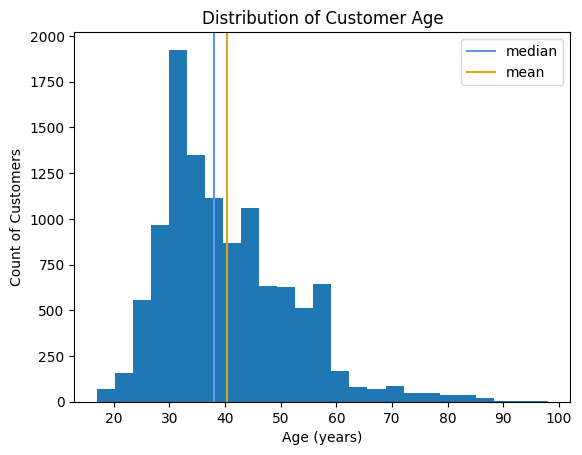

In [47]:
plt.figure()
plt.hist(bank_df["age"], bins=25)
plt.xlabel("Age (years)")
plt.ylabel("Count of Customers")
plt.title("Distribution of Customer Age")
plt.axvline(bank_df["age"].median(), label="median", color="cornflowerblue")
plt.axvline(bank_df["age"].mean(), label="mean", color="goldenrod")
plt.legend()
plt.show()


It appears that the majority of customers are around 30 years of age. The
distribution is skewed, so mean and median actually do not appear to be
appropriate ways to impute. Therefore, we will impute with the most frequent
bin, around 30 years.


In [52]:
bank_df['age'] = bank_df['age'].fillna(30)

#### Last_contact_duration

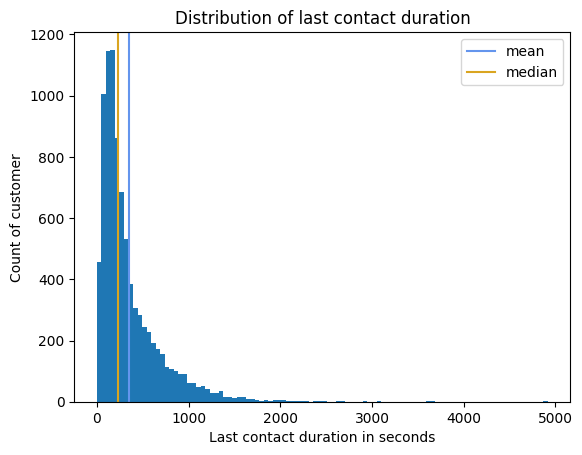

In [54]:
plt.figure()
plt.hist(bank_df["last_contact_duration"], bins=100)
plt.axvline(bank_df["last_contact_duration"].mean(), label="mean", color="cornflowerblue")
plt.axvline(bank_df["last_contact_duration"].median(), label="median", color="goldenrod")
plt.xlabel("Last contact duration in seconds")
plt.ylabel("Count of customer")
plt.title("Distribution of last contact duration")
plt.legend()
plt.show()

We can again see that there is a skew to this distribution, most customers do
not talk for long. Using the mean seems like it would introduce bias, the median
appear closer to the "peak" of the distribution, therefore we opt to impute
using the median.


In [55]:
Last_contact_duration_median = bank_df['last_contact_duration'].median()
bank_df['last_contact_duration'] = bank_df['last_contact_duration'].fillna(Last_contact_duration_median)

In [57]:
bank_df.isna().sum()

age                           0
job                         689
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
location                    689
dtype: int64

#### Job column - categorical

Text(0.5, 1.0, 'Distribution of the jobs')

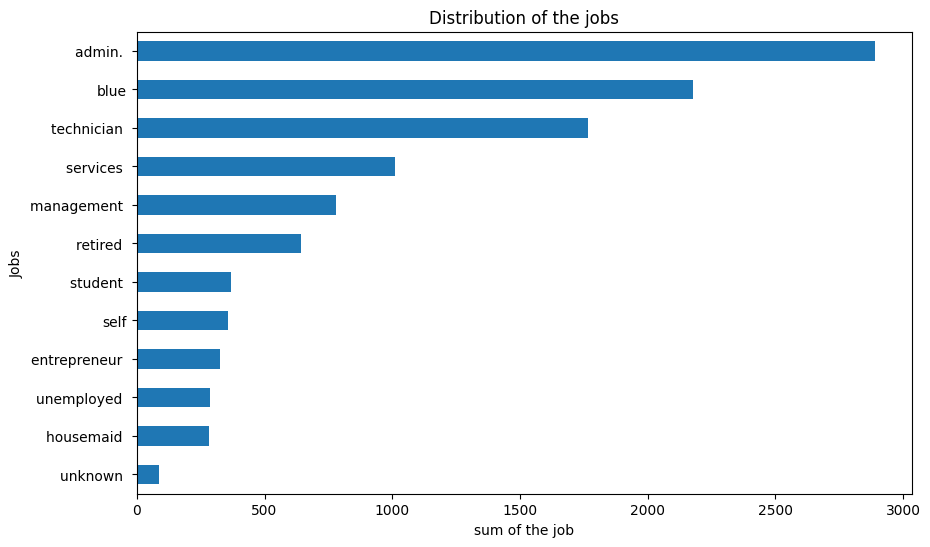

In [65]:
plt.figure(figsize=(10,6))
bank_df['job'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('sum of the job')
plt.ylabel('Jobs')
plt.title('Distribution of the jobs')

Looking at the above, we have insights about the customer base. The vast
majority appear to be administrative roles or "blue-collar". So perhaps an
optimal imputation strategy would just be to pick the mode, and impute all
missing jobs as "admin". But in this case there is already an "unknown" so we
will just change all the NAs to be "unknown".

In [73]:
bank_df.loc[bank_df['job'].isna(), 'job'] = 'unknown'


In [74]:
bank_df['job'].isna().sum()

0

#### Location column

In [75]:
bank_df['location'].isna().sum()

689

Text(0.5, 1.0, 'Distribution of the location')

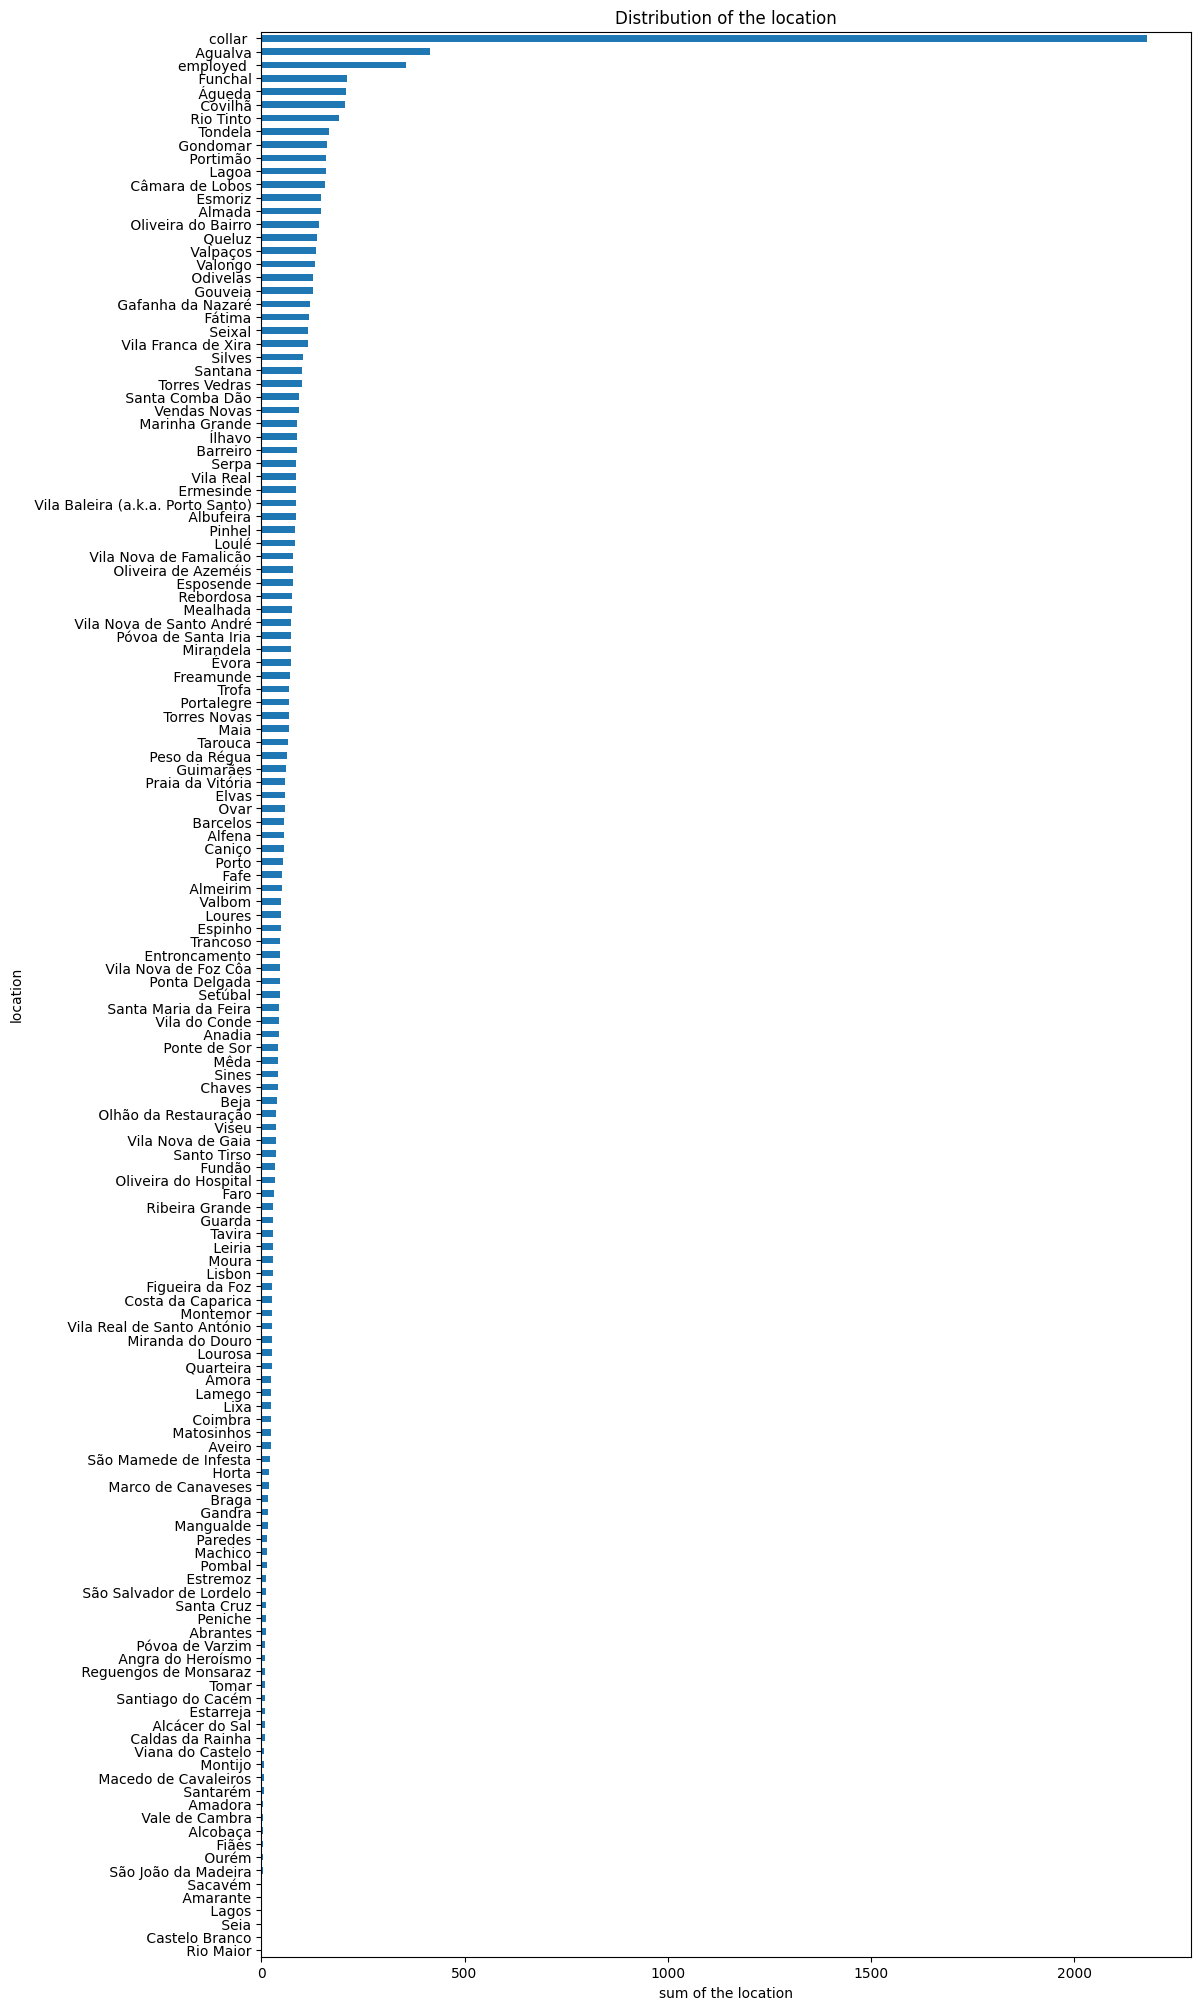

In [79]:
plt.figure(figsize=(12,25))
bank_df['location'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('sum of the location')
plt.ylabel('location')
plt.title('Distribution of the location')

There appears to be a wide variety of locations, with no clear majority.
Therefore, we choose to add an 'unknown' value to this column.


In [82]:
bank_df.loc[bank_df['location'].isna(), 'location'] = 'unknown'

In [83]:
bank_df.isna().sum()

age                           0
job                           0
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
location                      0
dtype: int64

marital

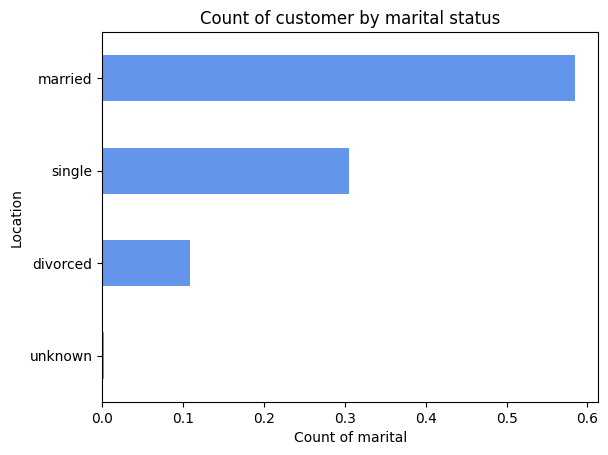

In [84]:
bank_df["marital"].value_counts(normalize=True).sort_values().plot(kind="barh", color="cornflowerblue")
plt.xlabel("Count of marital")
plt.ylabel("Location")
plt.title("Count of customer by marital status")
plt.show()


In [86]:
bank_df.loc[bank_df['marital'].isna(),'marital'] = 'unknown'

Education

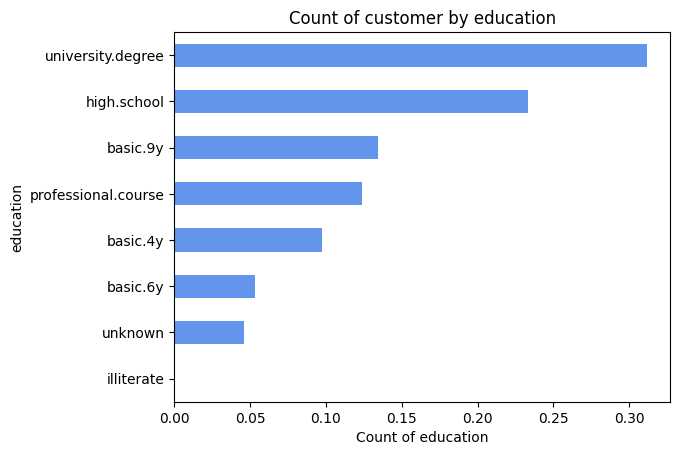

In [87]:
bank_df["education"].value_counts(normalize=True).sort_values().plot(kind="barh", color="cornflowerblue")
plt.xlabel("Count of education")
plt.ylabel("education")
plt.title("Count of customer by education")
plt.show()

In [89]:
bank_df["education"] = bank_df["education"].fillna("unknown")

### Exploratory Data Analysis (EDA)

Now that we've cleaned the data, let's do some analysis to address our original
question:

    What are the characteristics of the customers who register for the term
    deposit account?

We will divide our data into categorical and numeric and proceed in this way.

#checking the distribution of registered vs. non registered

In [92]:
(bank_df['registered'].value_counts()/bank_df.shape[0])*100

registered
no     60.241687
yes    39.758313
Name: count, dtype: float64

We see above, there is about a 60/40 split in registered and unregistered
customers. Let's take a look at the customer base overall.

Split the data into categorical and numerical variables, and do some EDA for
both types.


In [94]:
categorical_df = bank_df.select_dtypes('object').copy()
categorical_df.head()

,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,prev_campaign_outcome,registered,location
0,student,divorced,unknown,no,no,no,cellular,may,tue,nonexistent,no,Albufeira
1,services,married,professional.course,no,no,no,cellular,may,mon,nonexistent,no,Mealhada
2,housemaid,unknown,unknown,unknown,yes,yes,cellular,jul,thu,nonexistent,no,Vila Franca de Xira
3,retired,married,basic.4y,no,no,no,cellular,oct,wed,nonexistent,no,Mirandela
4,retired,married,unknown,no,unknown,unknown,telephone,may,tue,nonexistent,no,Funchal


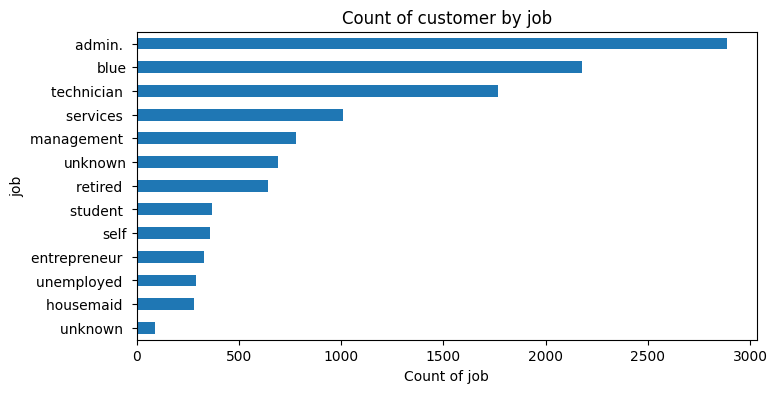

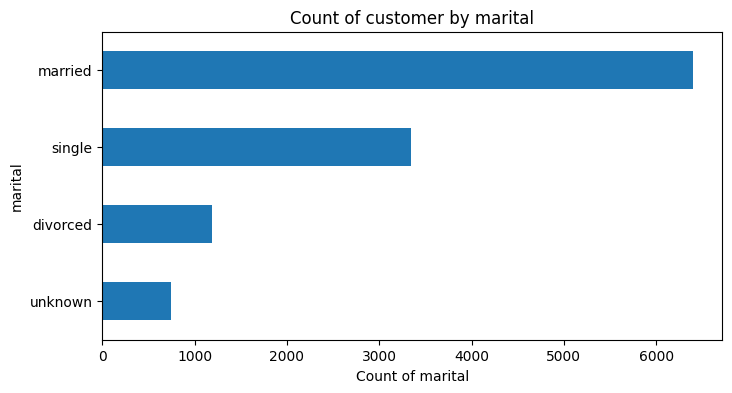

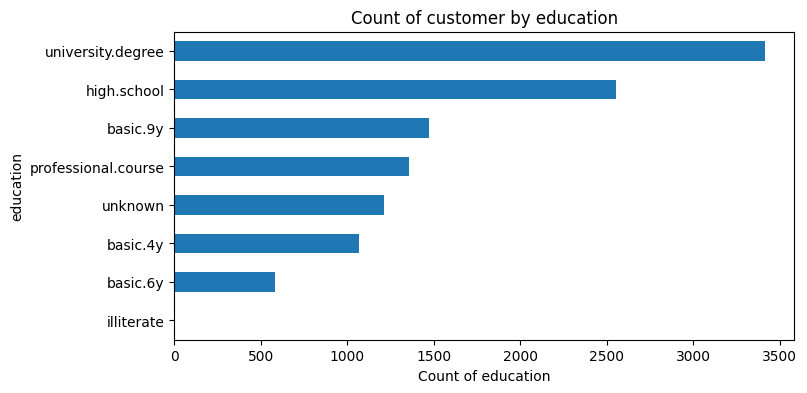

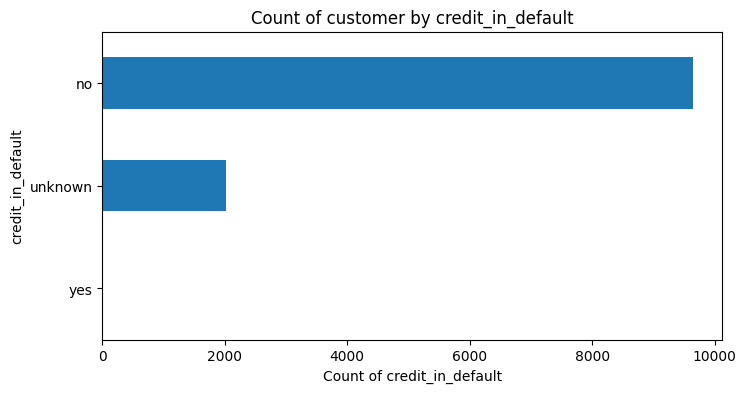

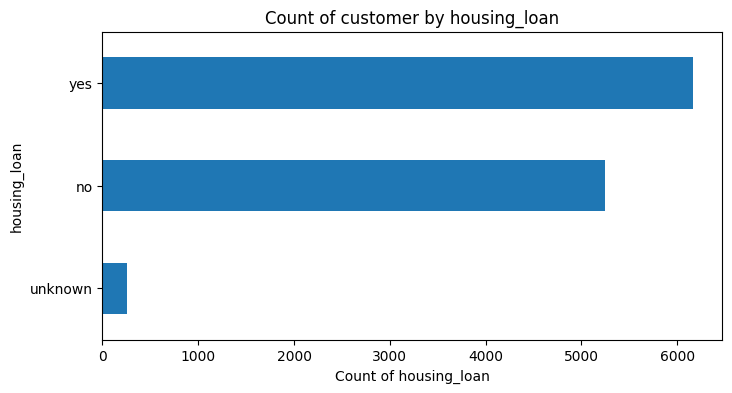

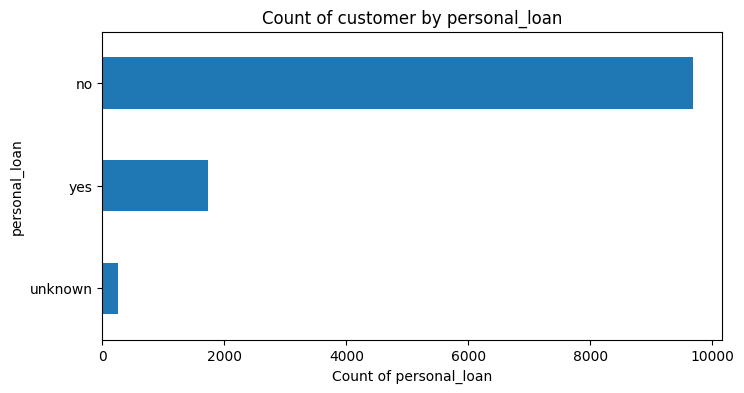

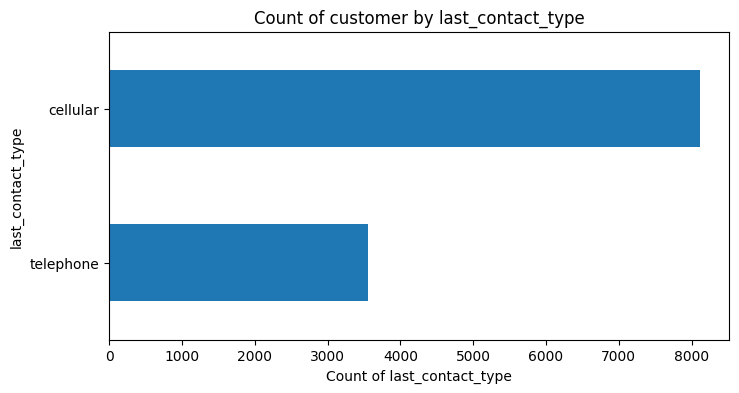

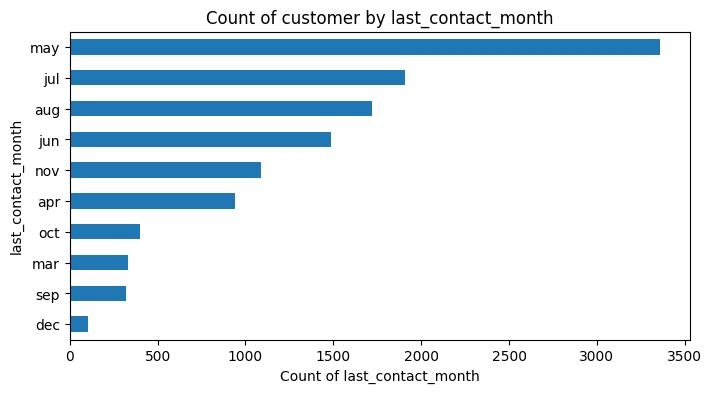

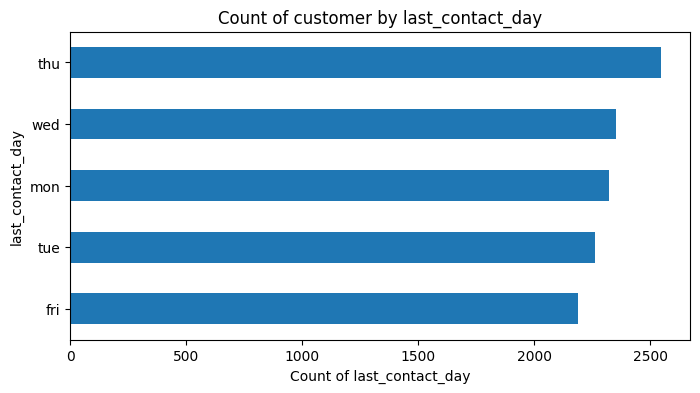

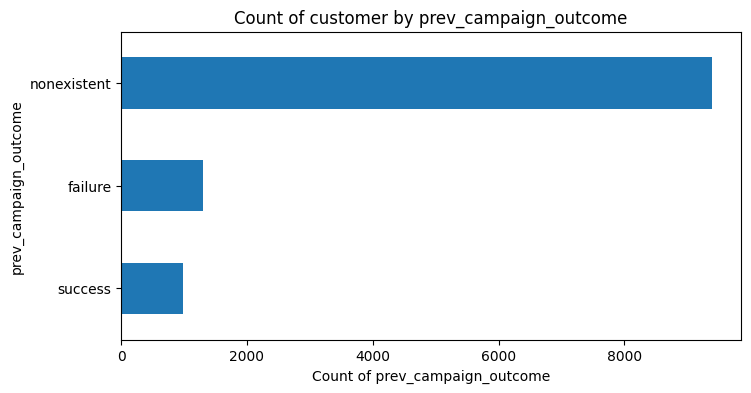

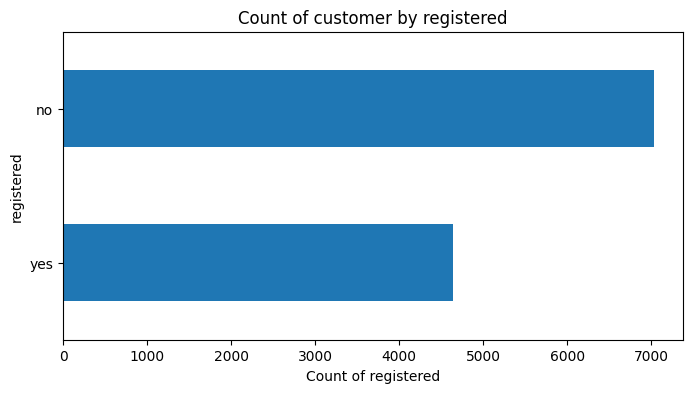

In [101]:
for col in categorical_df.columns[:-1]:
    categorical_df[col].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(8,4))
    plt.xlabel(f'Count of {col}')
    plt.ylabel(col)
    plt.title(f'Count of customer by {col}')
    plt.show()


We can see that:

- The majority of customers have jobs in admin, "blue collar" or "technician".
- Most of the customers are married.
- Most customers have a university or high school degree with very little other.
- The majority of customers do not have credit in default or with status
  unknown.
- There is almost a 50/50 split to whether or not customers have a housing loan.
- Most customers do not have a personal loan.
- The majority of customers were contacted via cellular, with most contacts
  happening in May, July, or August.
- ...

Numeric variables

In [121]:
numeric_df = bank_df.select_dtypes(['int64','float64']).copy()
numeric_df.head()

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
0,38.0,244.0,3,999,0
1,34.0,190.0,3,999,0
2,43.0,97.0,2,999,0
3,75.0,113.0,2,999,0
4,58.0,174.0,1,999,0


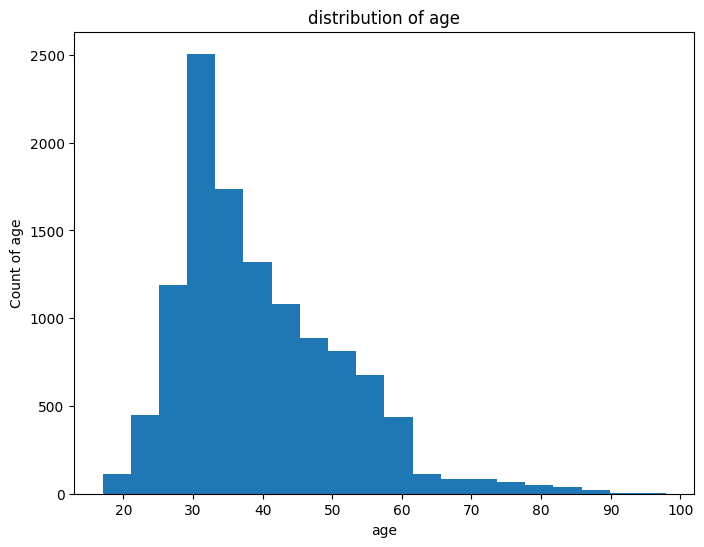

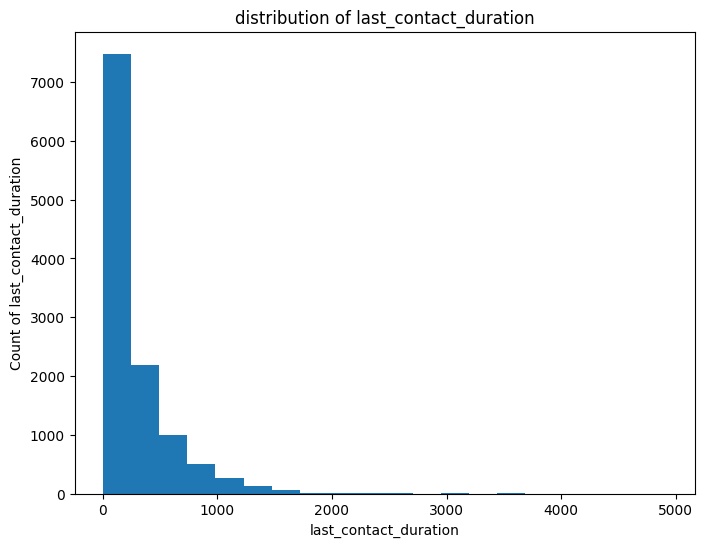

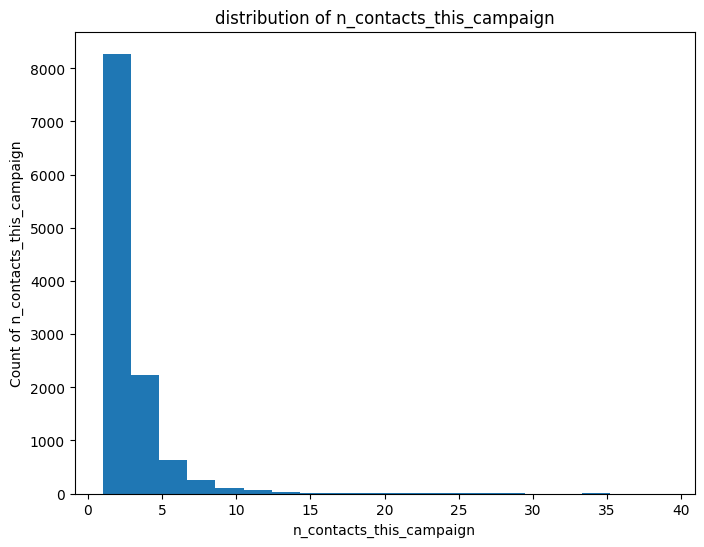

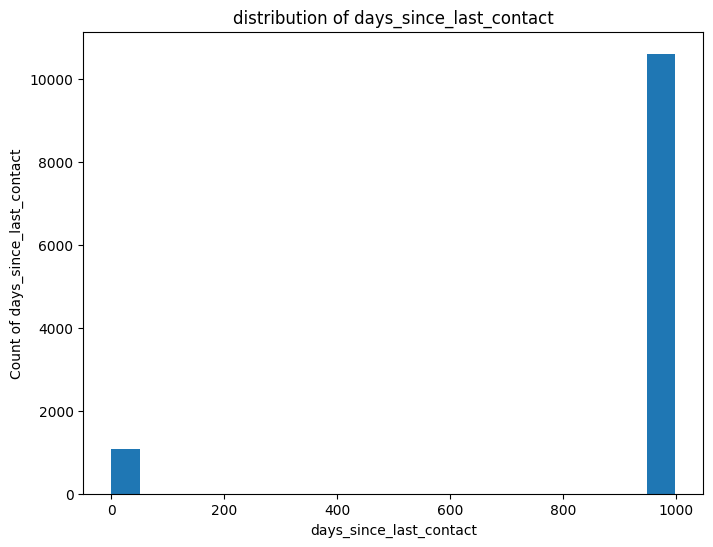

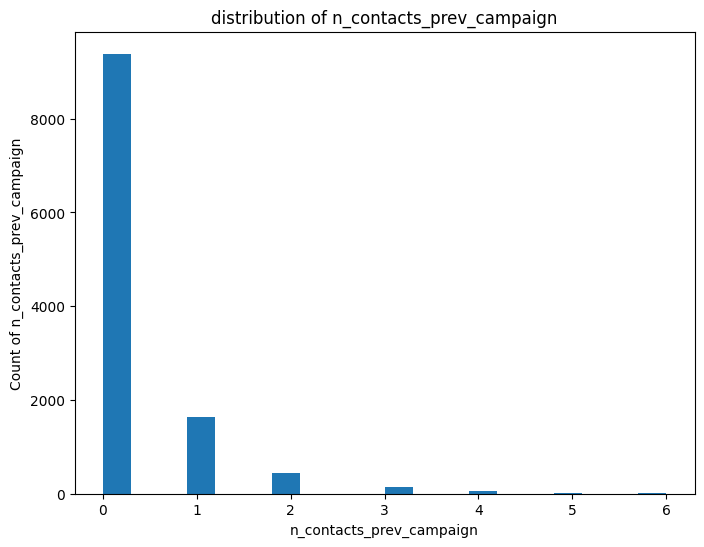

In [122]:
for col in numeric_df.columns:
    plt.figure(figsize=(8,6))
    plt.hist(numeric_df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel(f'Count of {col}')
    plt.title(f'distribution of {col}')

As we can see above, the majority of customers were not previously contacted.
Also, the age distribution is right-skewed with the majority in the 30's and the
last contact durations appear to follow a power law (most contact durations are
very short with very few long calls).

#### Bivariate - with respect to `registered` variable.

Look at the registered variable of interest. We will repeat our analysis over
the categorical variables after dividing by the registered column:

In [131]:
numeric_df_with_registered = pd.concat([numeric_df,bank_df['registered']], axis=1)


In [133]:
numeric_df_with_registered.groupby('registered').mean()

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
registered,,,,,
no,39.510172,222.249680,2.587993,985.147389,0.132878
yes,40.393619,468.981893,2.051951,791.990946,0.492779


In that above, we can see that while there is no difference in average age
between those that registered and did not, there does appear to be a large
difference between the last contact duration for those who registered vs. those
who did not:

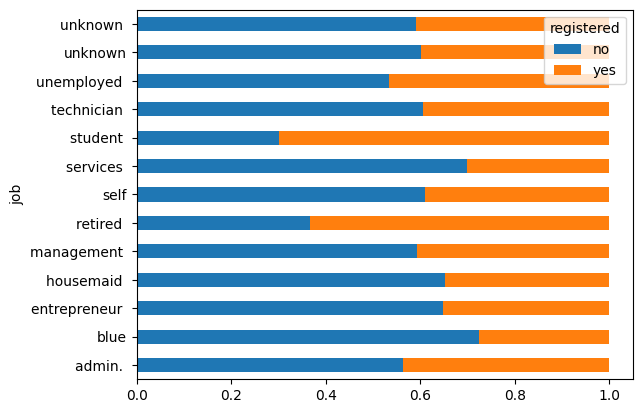

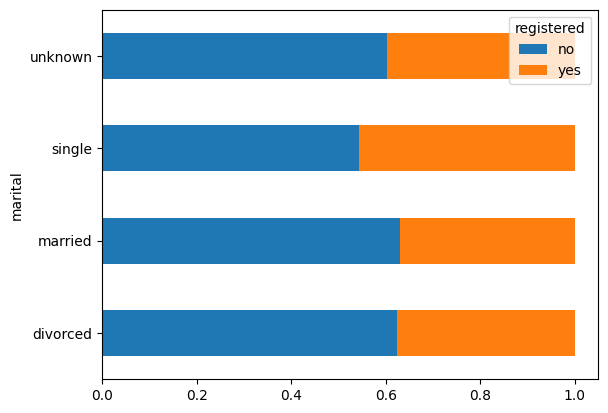

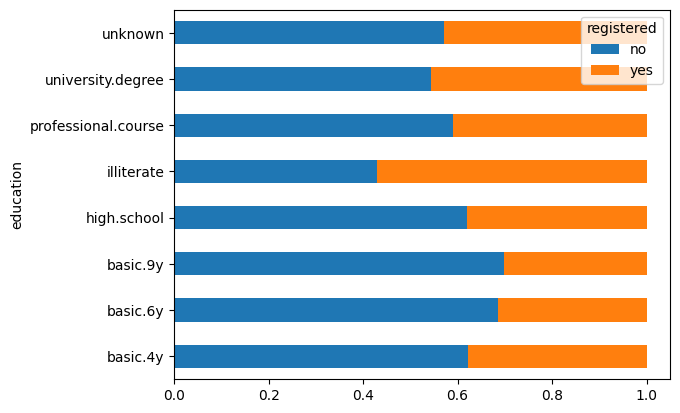

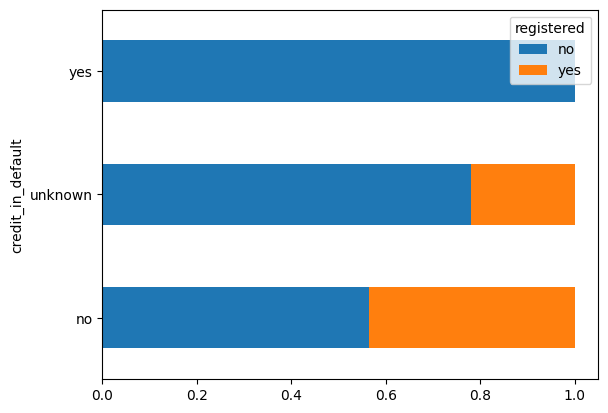

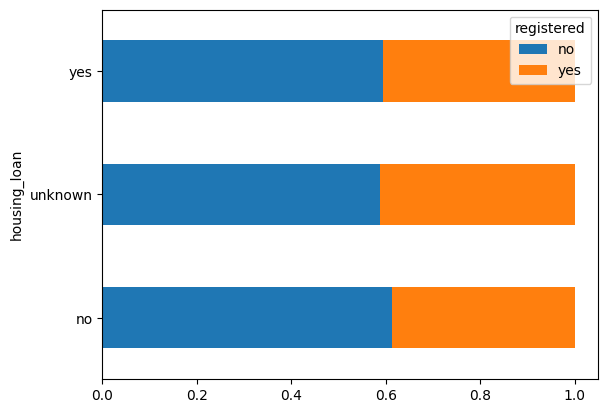

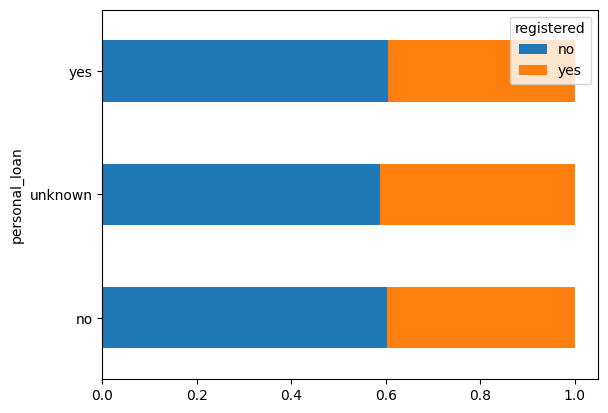

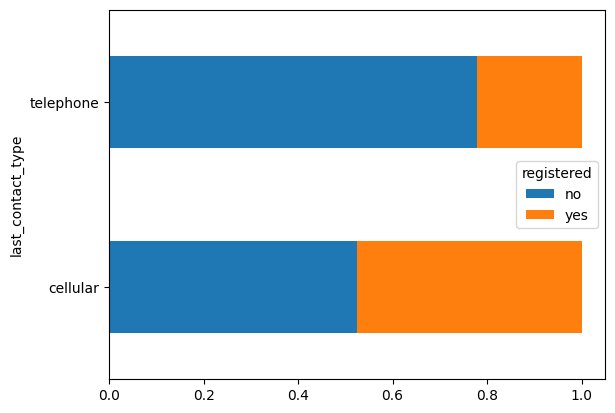

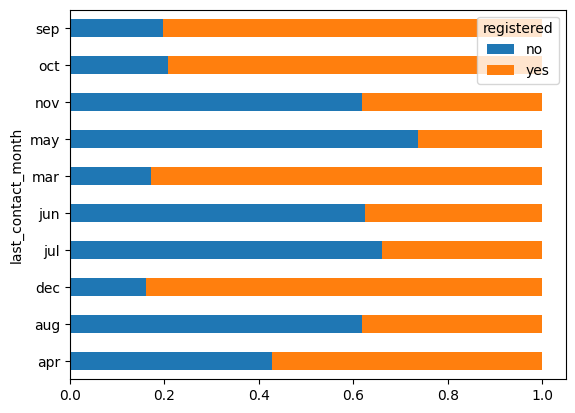

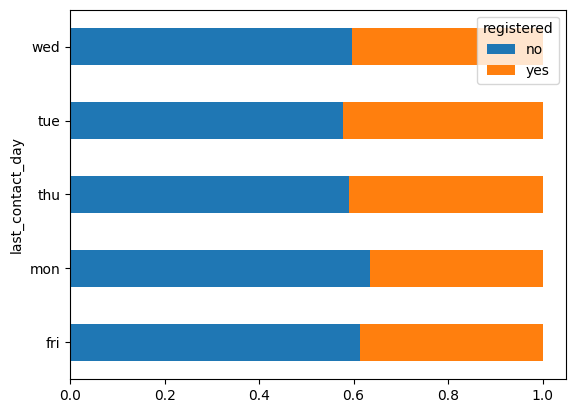

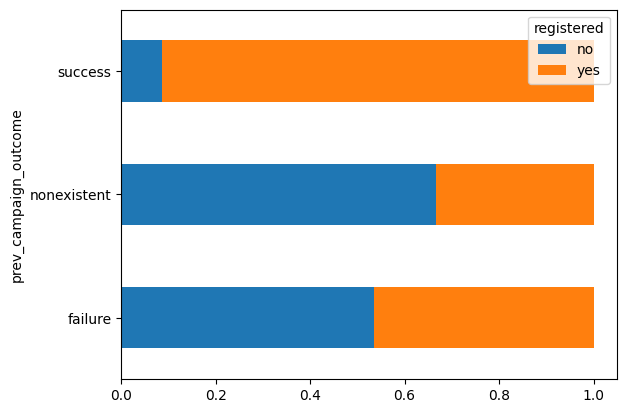

In [134]:
for column in categorical_df.iloc[:, :-2]:

    pct_registered_df = (
        categorical_df.groupby([column, "registered"])[column].count() / bank_df.groupby(column)[column].count()
    )

    pct_registered_df.unstack().plot(kind="barh", stacked=True)
    plt.show()


As we can see from the above:

- Many more students and retired registered, whereas much fewer "blue collar"
  and "technician" did.
- It seems slightly more in the "single" status registered than those who are
  married or divorced.
- Those in the "illiterate" category are far more likely to have registered - we
  know that this category is very small so this is unlikely to be significant.
- Those with credit in default are 50/50 to have registered, whereas as those
  without credit in default none have registered.
- Having a housing or personal loan does not seem to effect registering; the
  proportions are identical regardless of status here.
- Those that were last contacted by cellular were far more likely to have
  registered than those contacted by "land line" (_Note_: this is likely not
  causal, but probably has more to do with those who tend to still have land
  lines vs. owning a cell phone.)
- The day of the week contacted does not appear to have an effect on
  registration rates.
- Those who were a successful conversion in a previous campaign were far more
  likely (~90%) to register for the term deposit product.

#### Bivariate Analysis - Numeric Features

Now we will repeat the process for numeric variables.

In [137]:
# We need the "registered" variable so we will add it back to our numeric dataframe
numeric_df["registered"] = bank_df["registered"]

# Check
numeric_df.head()

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,registered
0,38.0,244.0,3,999,0,no
1,34.0,190.0,3,999,0,no
2,43.0,97.0,2,999,0,no
3,75.0,113.0,2,999,0,no
4,58.0,174.0,1,999,0,no


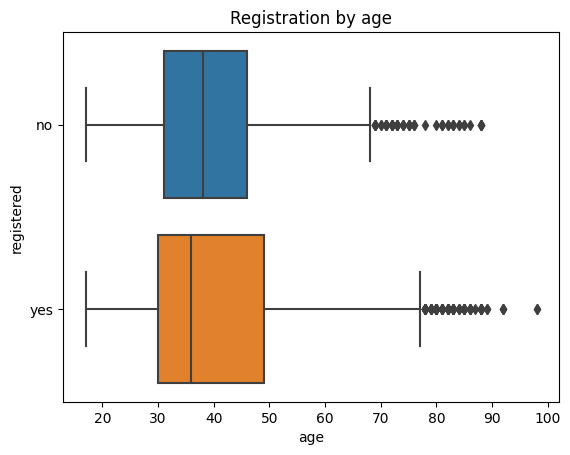

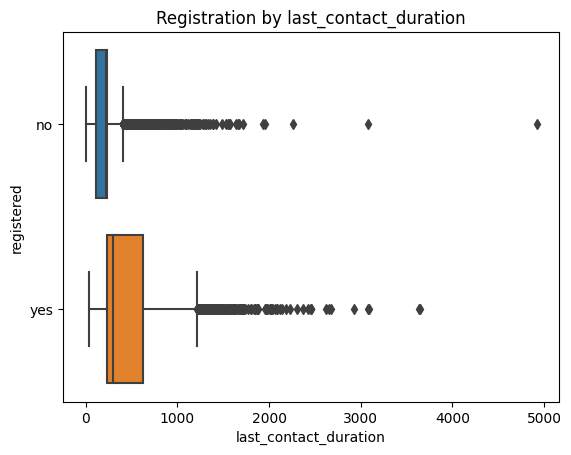

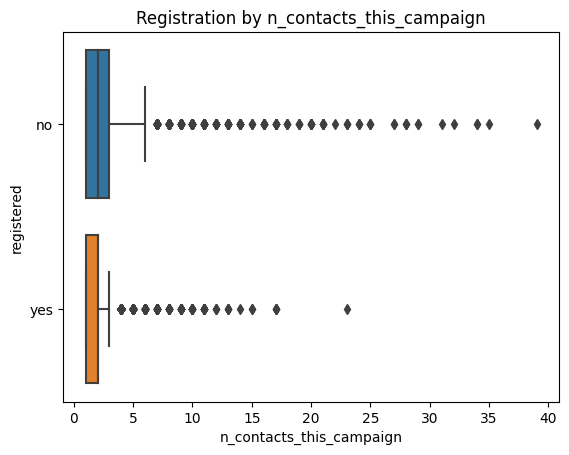

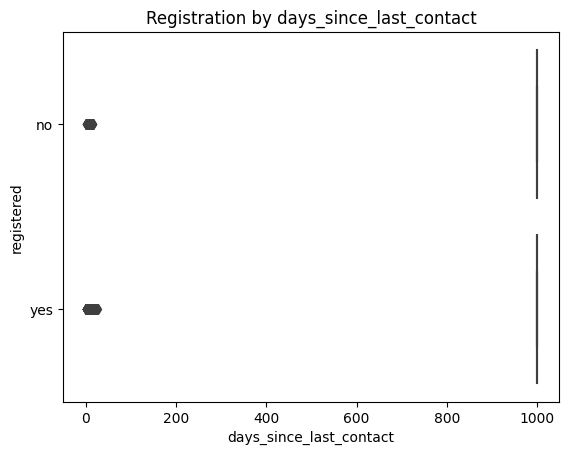

In [139]:
for col in numeric_df.iloc[:, :-2]:

    # Normalize the histogram by passing in 'stat=density' to account for differences in
    # counts by class.
    sns.boxplot(x=col, y="registered", data=bank_df)
    plt.title(f"Registration by {col}")
    plt.show()


- There does appear to be an effect of age on registration. For the most part,
  older people 60+ appear to be more likely to register than not. There also
  appears to be slightly more young people <= 25. This ties up with what we saw
  from the `job` column where 'Students' and 'Retirees' had much higher
  proportions of people registering than on average.
- Being contacted more times in the previous campaign generally leads to more
  registrations, however we know that only ~1065 people were actually previously
  contacted.


### Findings Summary

From our initial analysis let's summarize what we have found out so far about
the differences between customers who register versus those who do not.

- We have found out that younger and older people were more likely to register
  for the term deposit product. Perhaps these groups have less need for
  liquidity in the near term and can therefore sacrifice access to their funds
  for higher return.

- In contrast to this, people who work in employment sectors that traditionally
  pay hourly, have contract based work, or where most people are self employed,
  were far less likely than average to sign up for this product. This is
  probably due to a less certain/consistent future income streams

- People who had been contacted in previous campaigns were more likely to
  register for the product, however this was only a small portion of total
  customers.

- People who were last contacted via cellular phone and whose last contact was
  of longer duration were more likely to register. Continue tracking phone type
  and call duration to re-target appropriately.

- Contacts who were called during the months of September, October, December,
  March & April showed much higher conversion rates than those in other months.
  It's not entirely clear why, but it's worth noting that these months also had
  the lowest call volume. This merits further analysis.
